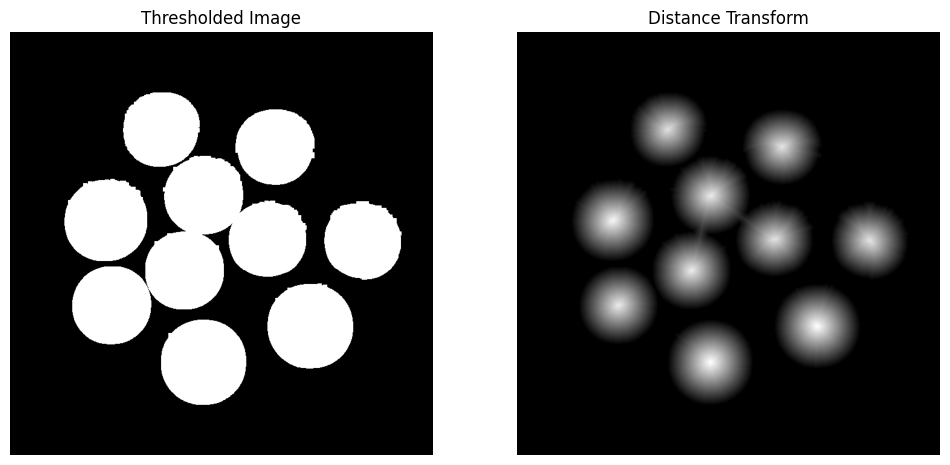

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

url = '../dataset/coins.jpg'
img = cv2.imread(url)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ker = np.ones((3, 3), np.uint8)
ret, bw = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
res = cv2.morphologyEx(bw, cv2.MORPH_DILATE, ker, iterations=3)

dist = cv2.distanceTransform(res, cv2.DIST_L2, maskSize=5)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(res, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dist, cmap='gray')
plt.title('Distance Transform')
plt.axis('off')

plt.show()

(135, 185, 3)


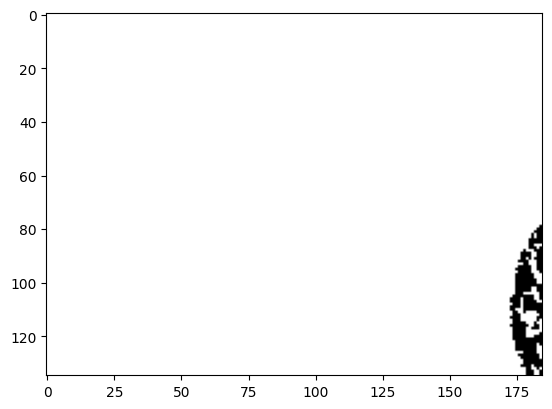

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
url = '../dataset/69.jpg'
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rgb = rgb[50:185, 20:205]
#rgb2 = cv2.resize(rgb,None,fx = 0.2, fy = 0.2)
print(rgb.shape)
plt.imshow(rgb)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray')

inverted = cv2.bitwise_not(thresh)
plt.imshow(inverted, cmap = 'gray')
contours, _ = cv2.findContours(inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(rgb, contours, -1, (255,0,0), 1)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w * h < 500:
        cv2.rectangle(rgb, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        cv2.rectangle(rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

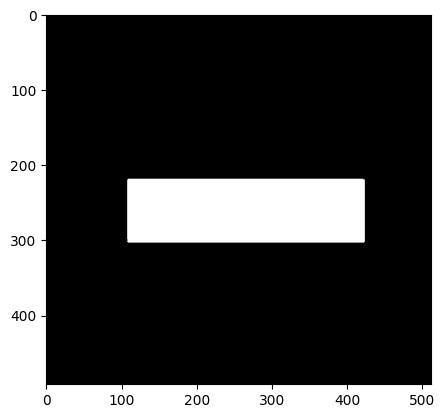

In [34]:
# Euclidean distance
import cv2
import numpy as np
import matplotlib.pyplot as plt
url = '../dataset/graylevelmid.jpg'
img = cv2.imread(url)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,bw =cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
plt.imshow(bw,cmap='gray')

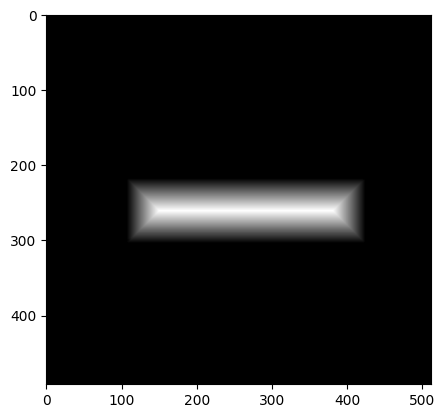

In [35]:
# ## Euclidean distance
dist = cv2.distanceTransform(bw,cv2.DIST_L2,maskSize=5)
cv2.normalize(dist,dist,0,1.0,cv2.NORM_MINMAX)
plt.imshow(dist,cmap='gray')

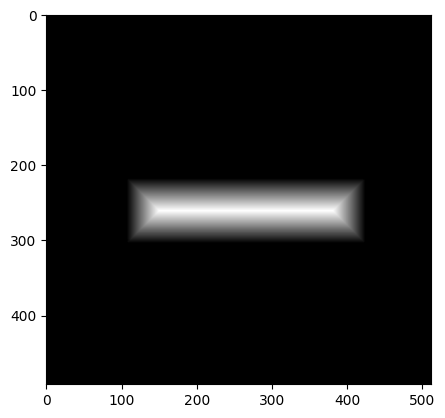

In [36]:
## City block distance
dist = cv2.distanceTransform(bw,cv2.DIST_L1,maskSize=5)
cv2.normalize(dist,dist,0,1.0,cv2.NORM_MINMAX)
plt.imshow(dist,cmap='gray')

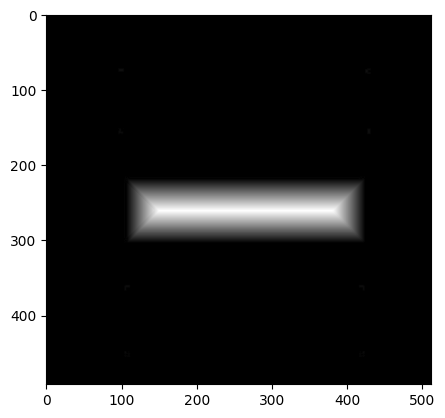

In [37]:
## Chessboard distance
dist = cv2.distanceTransform(gray,cv2.DIST_C,maskSize=5)
cv2.normalize(dist,dist,0,1.0,cv2.NORM_MINMAX)
plt.imshow(dist,cmap='gray')

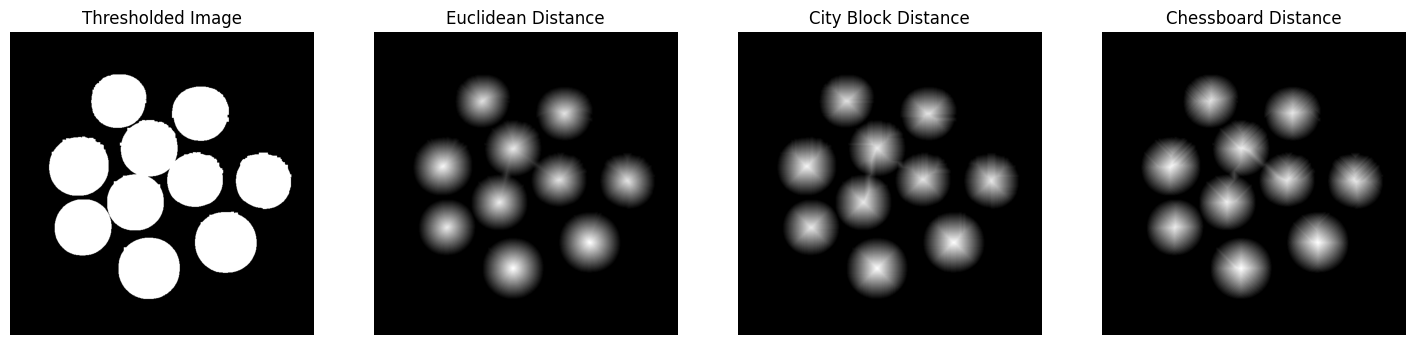

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread('../dataset/coins.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, bw = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

#dilation
ker = np.ones((3, 3), np.uint8)
res = cv2.morphologyEx(bw, cv2.MORPH_DILATE, ker, iterations=3)


dist_euclidean = cv2.distanceTransform(res, cv2.DIST_L2, 5)
dist_cityblock = cv2.distanceTransform(res, cv2.DIST_L1, 5)
dist_chessboard = cv2.distanceTransform(res, cv2.DIST_C, 5)


cv2.normalize(dist_euclidean, dist_euclidean, 0, 1.0, cv2.NORM_MINMAX)
cv2.normalize(dist_cityblock, dist_cityblock, 0, 1.0, cv2.NORM_MINMAX)
cv2.normalize(dist_chessboard, dist_chessboard, 0, 1.0, cv2.NORM_MINMAX)


plt.figure(figsize=(18, 6))

# Original Thresholded Image
plt.subplot(1, 4, 1)
plt.imshow(res, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Euclidean Distance Transform
plt.subplot(1, 4, 2)
plt.imshow(dist_euclidean, cmap='gray')
plt.title('Euclidean Distance')
plt.axis('off')

# City Block Distance Transform
plt.subplot(1, 4, 3)
plt.imshow(dist_cityblock, cmap='gray')
plt.title('City Block Distance')
plt.axis('off')

# Chessboard Distance Transform
plt.subplot(1, 4, 4)
plt.imshow(dist_chessboard, cmap='gray')
plt.title('Chessboard Distance')
plt.axis('off')

plt.show()


# Contour

In [ ]:
#show the rectangle of text objects with green color and thickness = 2 pixels .

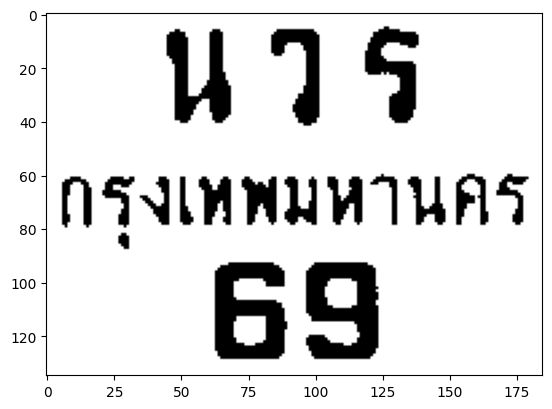

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
url = '../dataset/69.jpg'
img = cv2.imread(url)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Crop the image
cropped_img = bw[50:185, 20:205]

# Display the cropped binary image
plt.imshow(cropped_img, cmap='gray')
plt.show()


Number of contours found: 306


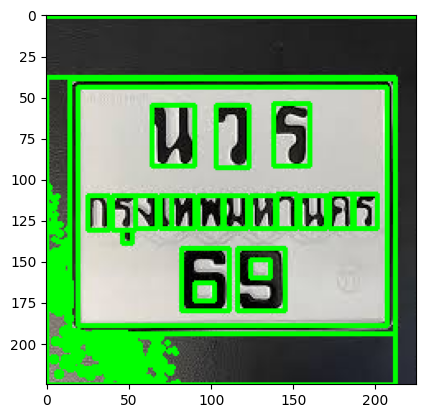

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
url = '../dataset/69.jpg'
img = cv2.imread(url)

# Convert to grayscale and threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Copy the original image for drawing
img2 = img.copy()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f"Number of contours found: {len(contours)}")

# Draw rectangles around detected contours
for i, contour in enumerate(contours):
    # Get the bounding rect
    x, y, w, h = cv2.boundingRect(contour)
    # Draw a green rectangle around the detected object
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the image with rectangles
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


Number of contours found: 306


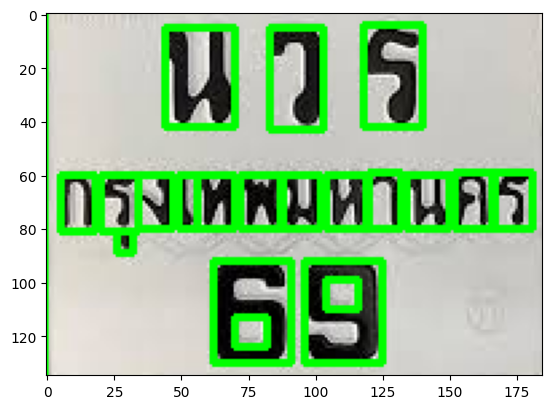

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
url = '../dataset/69.jpg'
img = cv2.imread(url)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Copy the original image for drawing
img2 = img.copy()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f"Number of contours found: {len(contours)}")

# Draw rectangles around detected contours on the original image
for contour in contours:
    # Get the bounding rect
    x, y, w, h = cv2.boundingRect(contour)
    # Draw a green rectangle around the detected object
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Crop the image after drawing rectangles
cropped_img = img2[50:185, 20:205]

# Display the cropped image with rectangles
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()


Number of contours found: 278


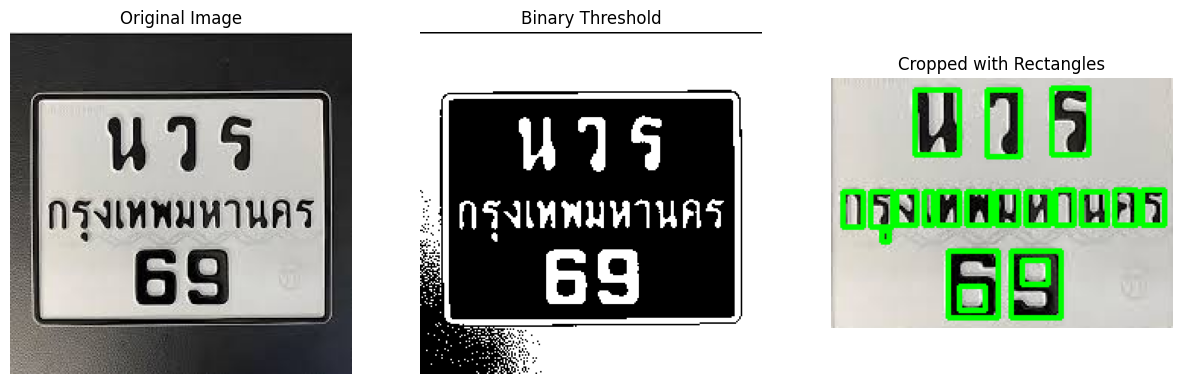

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
url = '../dataset/69.jpg'
img = cv2.imread(url)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_)

# Copy the original image for drawing
img2 = img.copy()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f"Number of contours found: {len(contours)}")

# Draw rectangles around detected contours on the original image
for contour in contours:
    # Get the bounding rect
    x, y, w, h = cv2.boundingRect(contour)
    # Draw a green rectangle around the detected object
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Crop the image after drawing rectangles
cropped_img = img2[50:185, 20:205]

# Display the images in subplots
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Binary Threshold Image
plt.subplot(1, 3, 2)
plt.imshow(bw, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')

# Cropped Image with Rectangles
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped with Rectangles')
plt.axis('off')

plt.show()


Number of contours found: 278


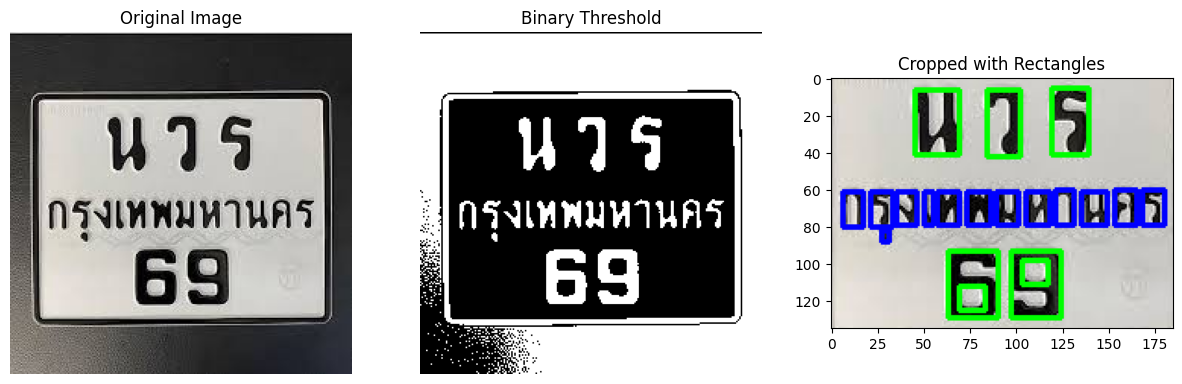

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
url = '../dataset/69.jpg'
img = cv2.imread(url)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# Copy the original image for drawing
img2 = img.copy()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f"Number of contours found: {len(contours)}")

# Draw rectangles around detected contours on the original image
for contour in contours:
    # Get the bounding rect
    x, y, w, h = cv2.boundingRect(contour)
    
    # Check if the top edge of the bounding box is between 55 and 85 pixels
    if 100 <= y <= 140:
        # Draw a blue rectangle around the detected object
        cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)
    else:
        # Draw a green rectangle around the detected object
        cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Crop the image after drawing rectangles
cropped_img = img2[50:185, 20:205]

# Display the images in subplots
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Binary Threshold Image
plt.subplot(1, 3, 2)
plt.imshow(bw, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')

# Cropped Image with Rectangles
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped with Rectangles')
plt.axis()

plt.show()

Number of contours found: 278


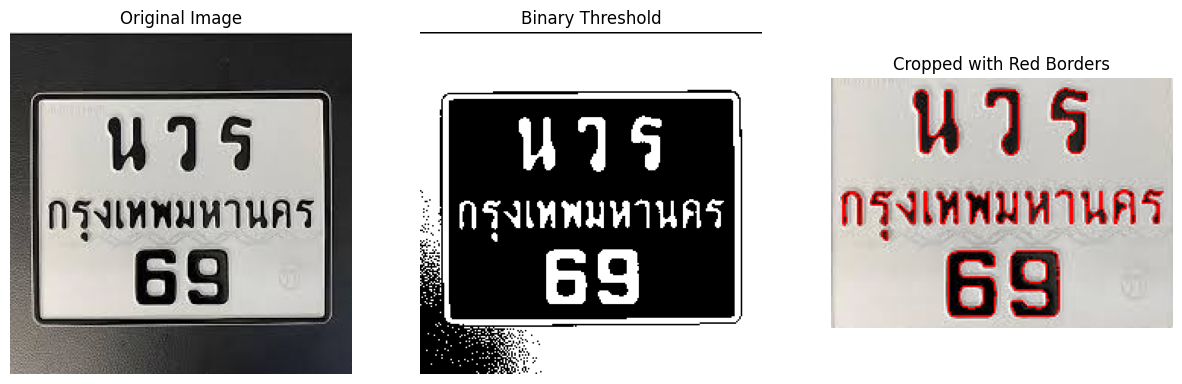

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
url = '../dataset/69.jpg'
img = cv2.imread(url)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# Copy the original image for drawing
img2 = img.copy()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

# Crop the image before drawing contours
cropped_img = img2[50:185, 20:205]

# Draw red borders around white text on the cropped image
for contour in contours:
    # Shift the contours to match the cropped image's coordinate system
    shifted_contour = contour - np.array([20, 50])

    # Check if the contour is within the crop area
    if cv2.boundingRect(contour)[1] >= 50 and cv2.boundingRect(contour)[0] >= 20:
        # Draw the contour with a red line
        cv2.drawContours(cropped_img, [shifted_contour], -1, (0, 0, 255), 1)

# Display the images in subplots
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Binary Threshold Image
plt.subplot(1, 3, 2)
plt.imshow(bw, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')

# Cropped Image with Red Borders around Text
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped with Red Borders')
plt.axis('off')

plt.show()


Number of contours found: 278


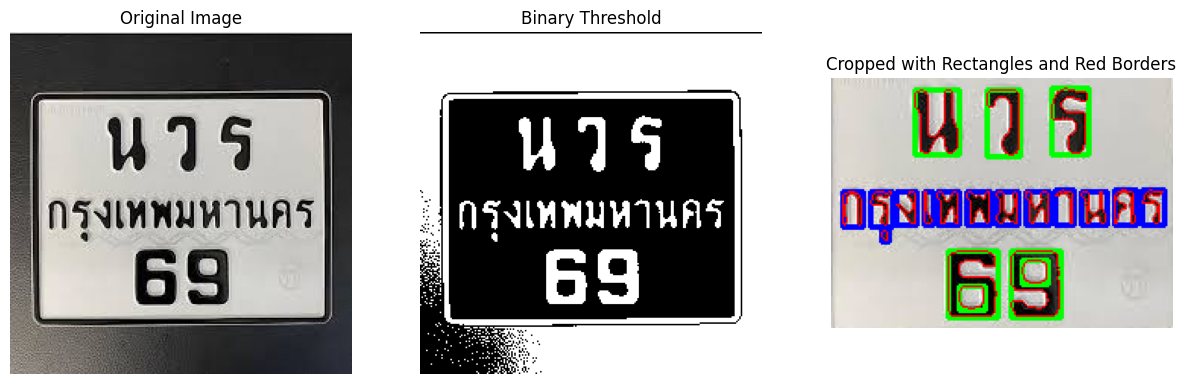

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
url = '../dataset/69.jpg'
img = cv2.imread(url)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# Copy the original image for drawing
img2 = img.copy()

# Find contours in the binary image
contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

# Crop the image before drawing
cropped_img = img2[50:185, 20:205]

# Draw rectangles and red borders on the cropped image
for contour in contours:
    # Calculate the bounding rect for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Adjust contour positions based on the crop area
    adjusted_x = x - 20  # Adjust for the left crop
    adjusted_y = y - 50  # Adjust for the top crop

    # Check if the contour is within the crop area
    if 20 <= x <= 205 and 50 <= y <= 185:
        # Draw rectangles with different colors based on the y-coordinate
        if 100 <= y <= 140:
            cv2.rectangle(cropped_img, (adjusted_x, adjusted_y), (adjusted_x + w, adjusted_y + h), (255, 0, 0), 2)
        else:
            cv2.rectangle(cropped_img, (adjusted_x, adjusted_y), (adjusted_x + w, adjusted_y + h), (0, 255, 0), 2)

        # Draw red borders around text by drawing the contours
        shifted_contour = contour - np.array([20, 50])  # Shift contour to match cropped image coordinates
        cv2.drawContours(cropped_img, [shifted_contour], -1, (0, 0, 255), 1)

# Display the images in subplots
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Binary Threshold Image
plt.subplot(1, 3, 2)
plt.imshow(bw, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')

# Cropped Image with Rectangles and Red Borders
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped with Rectangles and Red Borders')
plt.axis('off')

plt.show()


Number of contours found: 278


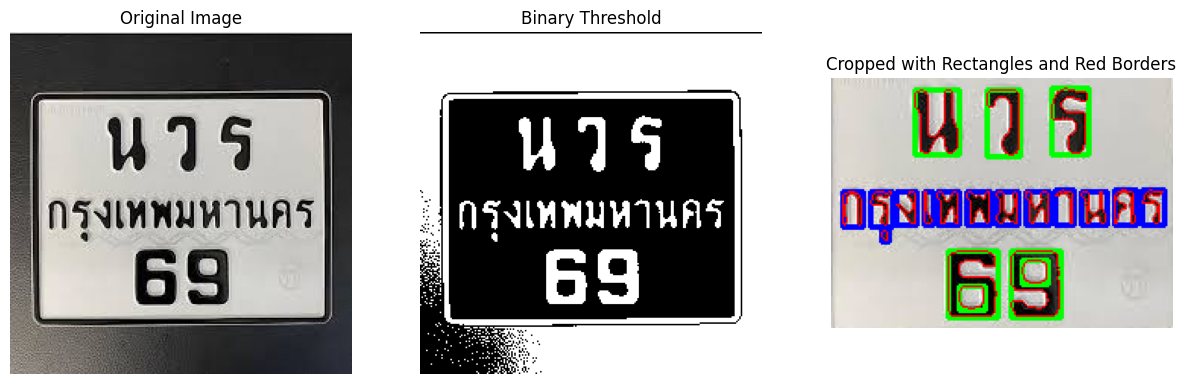

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


url = '../dataset/69.jpg'
img = cv2.imread(url)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

img2 = img.copy()


contours, hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

cropped_img = img2[50:185, 20:205]

# Draw rectangles and red borders on the cropped image
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # Adjust contour positions based on the crop area
    adjusted_x = x - 20  
    adjusted_y = y - 50  

    if 20 <= x <= 205 and 50 <= y <= 185:
        
        if 100 <= y <= 140:
            cv2.rectangle(cropped_img, (adjusted_x, adjusted_y), (adjusted_x + w, adjusted_y + h), (255, 0, 0), 2)
        else:
            cv2.rectangle(cropped_img, (adjusted_x, adjusted_y), (adjusted_x + w, adjusted_y + h), (0, 255, 0), 2)

        shifted_contour = contour - np.array([20, 50])  
        cv2.drawContours(cropped_img, [shifted_contour], -1, (0, 0, 255), 1)


plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Binary Threshold Image
plt.subplot(1, 3, 2)
plt.imshow(bw, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')

# Cropped Image with Rectangles and Red Borders
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped with Rectangles and Red Borders')
plt.axis('off')

plt.show()
